In [ ]:
#| hide
import sys
sys.path.append("/notebooks/katlas")
from nbdev.showdoc import *
%matplotlib inline

In [ ]:
#| export
from katlas.core import Data
from katlas.feature import *
from katlas.plot import *

/usr/local/lib/python3.9/dist-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/lib/python3.9/dist-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/lib/python3.9/dist-packages/umap/distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword argument 

# Prepare features for ML training

> a collection of tools to extract features from amino acid and protein

In this file, we will show you how to extract features from amino acid and protein

## Features from amino acid

We can use two methods to extract features from amino acid:
- Rdkit descriptors
- Morgan Fingerprints

### Rdkit descriptors

In [ ]:
# Download the amino acid info
aa_info = Data.get_aa_info()
aa_info2 = aa_info[['aa','SMILES']]

Extract all of the 209 rdkit features

In [ ]:
show_doc(smi2prop)

---

### smi2prop

>      smi2prop (df, smi_colname='SMILES', id_colname='ID',
>                remove_duplicate=False, thr=0.95, normalize=True)

Extract ~209 features from smiles via rdkit.Chem.Descriptors, and remove duplicate features

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| df |  |  | df needs to have SMILES an ID columns |
| smi_colname | str | SMILES | column name of smiles |
| id_colname | str | ID | column name of ID |
| remove_duplicate | bool | False | remove features that are highly correlated |
| thr | float | 0.95 | threshold of Pearson correlation |
| normalize | bool | True | normalize features using StandardScaler() |

In [ ]:
aa_full_feature = smi2prop(aa_info2, id_colname='aa',remove_duplicate=False)

In [ ]:
aa_full_feature.shape

(23, 210)

In [ ]:
aa_full_feature.head()

,aa,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,BCUT2D_MRHI,BCUT2D_MRLOW,AvgIpc,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,HallKierAlpha,Ipc,Kappa1,Kappa2,Kappa3,LabuteASA,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,PEOE_VSA14,PEOE_VSA2,PEOE_VSA3,PEOE_VSA4,PEOE_VSA5,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,SMR_VSA1,SMR_VSA10,SMR_VSA2,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SMR_VSA8,SMR_VSA9,SlogP_VSA1,SlogP_VSA10,SlogP_VSA11,SlogP_VSA12,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA5,SlogP_VSA6,SlogP_VSA7,SlogP_VSA8,SlogP_VSA9,TPSA,EState_VSA1,EState_VSA10,EState_VSA11,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,VSA_EState1,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,FractionCSP3,HeavyAtomCount,NHOHCount,NOCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,RingCount,MolLogP,MolMR,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,fr_COO2,fr_C_O,fr_C_O_noCOO,fr_C_S,fr_HOCCN,fr_Imine,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_Ndealkylation1,fr_Ndealkylation2,fr_Nhpyrrole,fr_SH,fr_aldehyde,fr_alkyl_carbamate,fr_alkyl_halide,fr_allylic_oxid,fr_amide,fr_amidine,fr_aniline,fr_aryl_methyl,fr_azide,fr_azo,fr_barbitur,fr_benzene,fr_benzodiazepine,fr_bicyclic,fr_diazo,fr_dihydropyridine,fr_epoxide,fr_ester,fr_ether,fr_furan,fr_guanido,fr_halogen,fr_hdrzine,fr_hdrzone,fr_imidazole,fr_imide,fr_isocyan,fr_isothiocyan,fr_ketone,fr_ketone_Topliss,fr_lactam,fr_lactone,fr_methoxy,fr_morpholine,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_nitroso,fr_oxazole,fr_oxime,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_phos_acid,fr_phos_ester,fr_piperdine,fr_piperzine,fr_priamide,fr_prisulfonamd,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,A,9.574074,-1.573701,1.193554,0.430590,-0.375462,-1.439770,-1.410267,-1.439436,-1.491575,0.0,-0.392233,0.228166,-0.308911,-0.398345,1.656688,0.103007,-0.780051,-0.526903,1.203883,-1.415519,1.465101,-1.347549,1.162418,-0.554270,0.678178,-1.660842,0.058766,-0.928528,-1.420966,-1.372879,-1.406169,-1.434358,-1.395786,-1.364454,-1.289650,-1.287461,-1.371840,-1.490293,-1.312462,-1.397762,0.661861,-0.443256,-1.488584,-1.704924,-1.164169,-1.472171,-1.088274,-0.113045,-0.213201,-0.308607,0.0,-0.521596,-0.682582,-0.458413,-0.308393,0.0,-0.647398,-0.224260,-0.480351,-0.694405,-0.68823,-0.882977,-0.213201,-0.432331,-0.495561,-0.290532,-0.695145,-0.511968,0.0,-0.308607,-0.482124,0.0,-0.308607,-0.510698,-1.373429,-0.884527,-0.45843,-0.241607,-0.504435,0.0,-0.213201,0.0,-0.945646,-0.535127,-0.661160,0.0,-0.922850,-0.621218,-0.611041,0.790873,-0.440926,-0.455591,-0.769976,-0.626017,-0.387091,-0.285797,-0.779939,-0.748232,-0.483822,0.342808,-0.393932,-0.462400,0.572190,0.387283,0.349099,-1.412520,-0.883541,-0.955395,0.0,-0.213201,-0.213201,-0.458831,-0.308607,-0.493197,-1.192079,-1.091089,-0.960437,-1.707117,0.0,-0.213201,-0.213201,-0.556890,-0.082356,-1.373751,-0.308607,-0.308607,-0.308607,0.0,0.0,-0.291386,-0.308607,-0.213201,-0.308607,-0.308607,-0.458831,-0.308607,0.0,0.0,0.0,-0.213201,-0.428746,-0.291386,0.0,0.0,0.0,-0.308607,-0.213201,0.0,0.0,0.0,0.0,-0.308607,0.0,0.0,0.0,0.0,0.0,0.0,-0.458831,0.0,-0.213201,0.0,0.0,0.0,0.0,0.0,0.0,-0.213201,0.0,0.0,0.0,-0.213201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

If you'd like to remove highly correlated features and features with no variance, set remove_duplicate to True, and set and threshold of Pearson correlation (recommand value 0.9-0.98)

In [ ]:
aa_reduced_feature = smi2prop(aa_info, id_colname='aa',remove_duplicate=True, thr=0.9)

number of 209 features are detected
dropping 67 features, as they have zero std variance:['NumRadicalElectrons', 'PEOE_VSA13', 'PEOE_VSA5', 'SMR_VSA8', 'SlogP_VSA10', 'SlogP_VSA7', 'SlogP_VSA9', 'EState_VSA11', 'NumAliphaticCarbocycles', 'NumSaturatedCarbocycles', 'fr_ArN', 'fr_Ar_COO', 'fr_C_S', 'fr_HOCCN', 'fr_Imine', 'fr_N_O', 'fr_Ndealkylation1', 'fr_Ndealkylation2', 'fr_aldehyde', 'fr_alkyl_carbamate', 'fr_alkyl_halide', 'fr_allylic_oxid', 'fr_amidine', 'fr_aniline', 'fr_aryl_methyl', 'fr_azide', 'fr_azo', 'fr_barbitur', 'fr_benzodiazepine', 'fr_diazo', 'fr_dihydropyridine', 'fr_epoxide', 'fr_ester', 'fr_ether', 'fr_furan', 'fr_halogen', 'fr_hdrzine', 'fr_hdrzone', 'fr_imide', 'fr_isocyan', 'fr_isothiocyan', 'fr_ketone', 'fr_ketone_Topliss', 'fr_lactam', 'fr_lactone', 'fr_methoxy', 'fr_morpholine', 'fr_nitrile', 'fr_nitro', 'fr_nitro_arom', 'fr_nitro_arom_nonortho', 'fr_nitroso', 'fr_oxazole', 'fr_oxime', 'fr_piperdine', 'fr_piperzine', 'fr_prisulfonamd', 'fr_pyridine', 'fr_quatN'

In [ ]:
aa_reduced_feature.head()

,aa,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,MinPartialCharge,MaxAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,BCUT2D_MRLOW,AvgIpc,BalabanJ,BertzCT,HallKierAlpha,Kappa2,Kappa3,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA14,PEOE_VSA2,PEOE_VSA3,PEOE_VSA4,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,SMR_VSA10,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SlogP_VSA1,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA8,EState_VSA1,EState_VSA10,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState7,VSA_EState8,FractionCSP3,NumAliphaticHeterocycles,NumAromaticHeterocycles,NumHAcceptors,MolLogP,fr_Al_COO,fr_Al_OH,fr_C_O,fr_NH0,fr_NH1,fr_sulfide,fr_unbrch_alkane
0,A,9.574074,1.193554,0.430590,-0.375462,-1.439770,0.228166,-0.308911,1.656688,0.103007,-0.780051,-0.526903,1.203883,-1.415519,1.465101,-1.347549,1.162418,0.678178,-1.660842,0.058766,-0.928528,0.661861,-1.704924,-1.164169,-1.088274,-0.113045,-0.213201,-0.308607,-0.521596,-0.682582,-0.458413,-0.308393,-0.647398,-0.224260,-0.480351,-0.694405,-0.882977,-0.432331,-0.495561,-0.290532,-0.695145,-0.511968,-0.482124,-1.373429,-0.884527,-0.45843,-0.213201,-0.535127,-0.661160,-0.922850,-0.621218,-0.611041,-0.440926,-0.455591,-0.769976,-0.626017,-0.748232,-0.483822,0.342808,-0.462400,0.572190,0.349099,-0.213201,-0.308607,-1.192079,-0.082356,-0.308607,-0.308607,-0.458831,-0.213201,-0.428746,-0.213201,-0.308607
1,C,9.756435,-0.594121,0.396312,-0.623715,-0.643882,0.233514,-0.311825,1.656688,1.401076,0.150357,1.981889,1.146308,-0.628535,0.696026,-0.795604,0.077060,0.765682,-0.684106,0.233728,-0.790419,1.460660,-0.601392,-0.581437,-1.088274,-0.113045,-0.213201,-0.308607,-0.521596,-0.682582,-0.458413,3.364183,-0.647398,-1.107502,0.556864,-0.694405,2.015850,-0.432331,-0.495561,-1.340339,0.914158,-0.511968,-0.482124,-0.257709,-0.884527,-0.45843,-0.213201,-0.535127,-0.661160,0.310554,-0.621218,-0.611041,-0.440926,-0.455591,2.765813,-0.626017,-0.709478,-0.437633,0.631861,-0.462400,-0.522169,0.349099,-0.213201,-0.308607,0.331133,-0.196341,-0.308607,-0.308607,-0.458831,-0.213201,-0.428746,-0.213201,-0.308607
2,D,9.846435,0.536545,0.158193,-0.369303,-0.347487,0.037668,-0.205110,-1.033743,-1.273733,-1.372129,-0.525782,0.115873,0.346261,0.398995,-0.516138,-0.084662,-3.545366,-0.722995,0.822870,-0.281516,-0.547747,-0.442263,0.200980,0.373629,-0.113045,-0.213201,-0.308607,1.500960,1.050911,-0.458413,-0.308393,-0.647398,-1.107502,-0.480351,1.110102,0.487224,-0.432331,-0.495561,-0.366786,-0.695145,-0.511968,-0.482124,0.774640,0.433147,-0.45843,-0.213201,1.741627,1.556719,-0.922850,-0.621218,-0.611041,-0.440926,-0.455591,-0.769976,0.487402,1.474811,-0.483206,-2.651958,-0.936726,-0.522169,-0.429755,-0.213201,-0.308607,0.331133,-0.772086,3.240370,-0.308607,2.179449,-0.213201,-0.428746,-0.213201,-0.308607
3,E,9.993880,-1.144174,0.263960,-0.056770,0.000656,0.028134,-0.199915,-1.248978,-1.218664,-0.661636,-0.526379,-0.271923,0.069844,0.109885,-0.172745,0.256753,-0.437180,-0.085041,0.534017,-0.174262,-0.547747,0.361706,0.487383,0.373629,-0.113045,-0.213201,-0.308607,1.500960,1.050911,-0.458413,-0.308393,-0.647398,-0.288416,0.677296,-0.694405,0.487224,-0.432331,-0.495561,0.606766,-0.695145,-0.511968,-0.482124,0.774640,0.433147,-0.45843,-0.213201,0.561766,1.556719,1.830379,-0.621218,-0.611041,-0.440926,-0.455591,-0.769976,0.487402,1.540314,-0.410105,-2.063646,-0.662030,-0.522169,0.037557,-0.213201,-0.308607,0.331133,-0.278572,3.240370,-0.308607,2.179449,-0.213201,-0.428746,-0.213201,-0.308607
4,F,10.378642,0.050359,0.433525,1.825444,0.448946,0.231079,-0.310499,-1.168265,-0.723037,0.404105,-0.526883,-0.818551,-0.069808,-0.311742,0.192350,-0.048318,0.413831,0.726870,-1.313071,0.839266,-1.118318,0.399290,-0.669480,-1.088274,-0.113045,-0.213201,-0.308607,-0.521596,-0.682582,-0.458413,-0.308393,2.903823,0.421299,-0.480351,-0.694405,-

In [ ]:
aa_reduced_feature.shape

(23, 73)

### Morgan Fingerprints

In [ ]:
show_doc(smi2morgan)

---

### smi2morgan

>      smi2morgan (df, smi_colname='SMILES', id_colname='ID')

Like `smi2prop`, get 2048 morgan feature (0/1) given a dataframe that contains ID&smiles

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| df |  |  | a dataframe contains ID and SMILES columns |
| smi_colname | str | SMILES | set smiles columne name |
| id_colname | str | ID | set ID column name |

In [ ]:
aa_morgan = smi2morgan(aa_info, id_colname = 'aa')

In [ ]:
aa_morgan.head()

,aa,morgan_0,morgan_1,morgan_2,morgan_3,morgan_4,morgan_5,morgan_6,morgan_7,morgan_8,morgan_9,morgan_10,morgan_11,morgan_12,morgan_13,morgan_14,morgan_15,morgan_16,morgan_17,morgan_18,morgan_19,morgan_20,morgan_21,morgan_22,morgan_23,morgan_24,morgan_25,morgan_26,morgan_27,morgan_28,morgan_29,morgan_30,morgan_31,morgan_32,morgan_33,morgan_34,morgan_35,morgan_36,morgan_37,morgan_38,morgan_39,morgan_40,morgan_41,morgan_42,morgan_43,morgan_44,morgan_45,morgan_46,morgan_47,morgan_48,morgan_49,morgan_50,morgan_51,morgan_52,morgan_53,morgan_54,morgan_55,morgan_56,morgan_57,morgan_58,morgan_59,morgan_60,morgan_61,morgan_62,morgan_63,morgan_64,morgan_65,morgan_66,morgan_67,morgan_68,morgan_69,morgan_70,morgan_71,morgan_72,morgan_73,morgan_74,morgan_75,morgan_76,morgan_77,morgan_78,morgan_79,morgan_80,morgan_81,morgan_82,morgan_83,morgan_84,morgan_85,morgan_86,morgan_87,morgan_88,morgan_89,morgan_90,morgan_91,morgan_92,morgan_93,morgan_94,morgan_95,morgan_96,morgan_97,morgan_98,morgan_99,morgan_100,morgan_101,morgan_102,morgan_103,morgan_104,morgan_105,morgan_106,morgan_107,morgan_108,morgan_109,morgan_110,morgan_111,morgan_112,morgan_113,morgan_114,morgan_115,morgan_116,morgan_117,morgan_118,morgan_119,morgan_120,morgan_121,morgan_122,morgan_123,morgan_124,morgan_125,morgan_126,morgan_127,morgan_128,morgan_129,morgan_130,morgan_131,morgan_132,morgan_133,morgan_134,morgan_135,morgan_136,morgan_137,morgan_138,morgan_139,morgan_140,morgan_141,morgan_142,morgan_143,morgan_144,morgan_145,morgan_146,morgan_147,morgan_148,morgan_149,morgan_150,morgan_151,morgan_152,morgan_153,morgan_154,morgan_155,morgan_156,morgan_157,morgan_158,morgan_159,morgan_160,morgan_161,morgan_162,morgan_163,morgan_164,morgan_165,morgan_166,morgan_167,morgan_168,morgan_169,morgan_170,morgan_171,morgan_172,morgan_173,morgan_174,morgan_175,morgan_176,morgan_177,morgan_178,morgan_179,morgan_180,morgan_181,morgan_182,morgan_183,morgan_184,morgan_185,morgan_186,morgan_187,morgan_188,morgan_189,morgan_190,morgan_191,morgan_192,morgan_193,morgan_194,morgan_195,morgan_196,morgan_197,morgan_198,morgan_199,morgan_200,morgan_201,morgan_202,morgan_203,morgan_204,morgan_205,morgan_206,morgan_207,morgan_208,morgan_209,morgan_210,morgan_211,morgan_212,morgan_213,morgan_214,morgan_215,morgan_216,morgan_217,morgan_218,morgan_219,morgan_220,morgan_221,morgan_222,morgan_223,morgan_224,morgan_225,morgan_226,morgan_227,morgan_228,morgan_229,morgan_230,morgan_231,morgan_232,morgan_233,morgan_234,morgan_235,morgan_236,morgan_237,morgan_238,morgan_239,morgan_240,morgan_241,morgan_242,morgan_243,morgan_244,morgan_245,morgan_246,morgan_247,morgan_248,morgan_249,morgan_250,morgan_251,morgan_252,morgan_253,morgan_254,morgan_255,morgan_256,morgan_257,morgan_258,morgan_259,morgan_260,morgan_261,morgan_262,morgan_263,morgan_264,morgan_265,morgan_266,morgan_267,morgan_268,morgan_269,morgan_270,morgan_271,morgan_272,morgan_273,morgan_274,morgan_275,morgan_276,morgan_277,morgan_278,morgan_279,morgan_280,morgan_281,morgan_282,morgan_283,morgan_284,morgan_285,morgan_286,morgan_287,morgan_288,morgan_289,morgan_290,morgan_291,morgan_292,morgan_293,morgan_294,morgan_295,morgan_296,morgan_297,morgan_298,morgan_299,morgan_300,morgan_301,morgan_302,morgan_303,morgan_304,morgan_305,morgan_306,morgan_307,morgan_308,morgan_309,morgan_310,morgan_311,morgan_312,morgan_313,morgan_314,morgan_315,morgan_316,morgan_317,morgan_318,morgan_319,morgan_320,morgan_321,morgan_322,morgan_323,morgan_324,morgan_325,morgan_326,morgan_327,morgan_328,morgan_329,morgan_330,morgan_331,morgan_332,morgan_333,morgan_334,morgan_335,morgan_336,morgan_337,morgan_338,morgan_339,morgan_340,morgan_341,morgan_342,morgan_343,morgan_344,morgan_345,morgan_346,morgan_347,morgan_348,morgan_349,morgan_350,morgan_351,morgan_352,morgan_353,morgan_354,morgan_355,morgan_356,morgan_357,morgan_358,morgan_359,morgan_360,morgan_361,morgan_362,morgan_363,morgan_364,morgan_365,morgan_366,morgan_367,morgan_368,morgan_369,morgan_370,morgan_371,morgan_372,mor

In [ ]:
aa_morgan.shape

(23, 2049)

## Features from kinase protein

With the advancement of language models in protein field, there are many models we can use to extract protein features. In this module, we use ESMfold2 to get protein embeddings. 

In [ ]:
# Download the kinase info
kinase = Data.get_kinase_info()

In [ ]:
kinase.head(1)

,Uniprot,kinase,Gene,Family,range,Co-expressed binding partners (lengths),Expression system,Purification technique (fusion tag),Special methods of activation or stabilization,Reaction conditions,temperature(C),Species,original_sequence,sequence,length,category,category_big
0,Q2M2I8,AAK1,AAK1,Other,aa27-365,NaN,"E. coli, codon-optimized",Nickel affinity (N-terminal His6 tag),NaN,"25 ???: 50 mM Tris pH 7.5, 100 mM NaCl, 0.02% Triton X-100, 0.2 mg/mL BSA, 10 mM MgCl2",25,human,MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQVTVDEVLAEGGFAIVFLVRTSNGMKCALKRMFVNNEHDLQVCKREIQIMRDLSGHKNIVGYIDSSINNVSSGDVWEVLILMDFCRGGQVVNLMNQRLQTGFTENEVLQIFCDTCEAVARLHQCKTPIIHRDLKVENILLHDRGHYVLCDFGSATNKFQNPQTEGVNAVEDEIKKYTTLSYRAPEMVNLYSGKIITTKADIWALGCLLYKLCYFTLPFGESQVAICDGNFTIPDNSRYSQDMHCLIRYMLEPDPDKRPDIYQVSYFSFKLLKKECPIPNVQNSPIPAKLPEPVKASEAAAKKTQPKARLTDPIPTTETSIAPRQRPKAGQTQPNPGILPIQPALTPRKRATVQPPPQAAGSSNQPGLLASVPQPKPQAPPSQPLPQTQAKQPQAPPTPQQTPSTQAQGLPAQAQATPQHQQQLFLKQQQQQQQPPPAQQQPAGTFYQQQQAQTQQFQAVHPATQKPAIAQFPVVSQGGSQQQLMQNFYQQQQQQQQQQQQQQLATALHQQQLMTQQAALQQKPTMAAGQQPQPQPAAAPQPAPAQEPAIQAP...,TSGLGSGYIGRVFGIGRQQVTVDEVLAEGGFAIVFLVRTSNGMKCALKRMFVNNEHDLQVCKREIQIMRDLSGHKNIVGYIDSSINNVSSGDVWEVLILMDFCRGGQVVNLMNQRLQTGFTENEVLQIFCDTCEAVARLHQCKTPIIHRDLKVENILLHDRGHYVLCDFGSATNKFQNPQTEGVNAVEDEIKKYTTLSYRAPEMVNLYSGKIITTKADIWALGCLLYKLCYFTLPFGESQVAICDGNFTIPDNSRYSQDMHCLIRYMLEPDPDKRPDIYQVSYFSFKLLKKECPIPNVQNSPIPAKLPEPVKASEAAAKKTQPKARLTDPIPTTETSIA,339,NAK,NAK


In [ ]:
# Check biggest kinase
kinase.sort_values(by='length',ascending=False).length[:10]

230    4128
257    3661
9      3056
10     2644
115    1568
292    1321
8      1244
256    1235
166    1188
22     1085
Name: length, dtype: int64

In [ ]:
# due to the computing limit, we can only extract features from proteins with length < 1500
kinase = kinase.query('length<1500').reset_index(drop=True)

Uncheck below to implement. It will take some time to finish extraction. You can skip this step to the next if you'd like to save time

In [ ]:
show_doc(esm_embeddings)

---

### esm_embeddings

>      esm_embeddings (df:pandas.core.frame.DataFrame, seq_colname:str,
>                      model_name:str='esm2_t33_650M_UR50D')

Extract 1280 esmfold2 embeddings from protein sequence.

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| df | DataFrame |  |  |
| seq_colname | str |  | The name of the column containing the sequences. |
| model_name | str | esm2_t33_650M_UR50D | The name of the ESM model to use for the embeddings. |
| **Returns** | **DataFrame** |  |  |

In [ ]:
# esmfeature = esm_embeddings(kinase,'sequence')

In [ ]:
# esmfeature= pd.concat([kinase[['kinase']],esmfeature.copy()],axis=1) # add a name col
# esmfeature.to_csv('esmfeature.csv',index=False) # save the file

The output file looks like this

In [ ]:
esmfeature = Data.get_esm()

In [ ]:
esmfeature.head(2)

,kinase,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,...,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115,1116,1117,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128,1129,1130,1131,1132,1133,1134,1135,1136,1137,1138,1139,1140,1141,1142,1143,1144,1145,1146,1147,1148,1149,1150,1151,1152,1153,1154,1155,1156,1157,1158,1159,1160,1161,1162,1163,1164,1165,1166,1167,1168,1169,1170,1171,1172,1173,1174,1175,1176,1177,1178,1179,1180,1181,1182,1183,1184,1185,1186,1187,1188,1189,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199,1200,1201,1202,1203,1204,1205,1206,1207,1208,1209,1210,1211,1212,1213,1214,1215,1216,1217,1218,1219,1220,1221,1222,1223,1224,1225,1226,1227,1228,1229,1230,1231,1232,1233,1234,1235,1236,1237,1238,1239,1240,1241,1242,1243,1244,1245,

In [ ]:
esmfeature.shape

(298, 1281)

As the number of features is large (1280), we can reduce the feature number using PCA

In [ ]:
pcafeature = reduce_dim(esmfeature, n_components=32, save = 'pca.pkl') # save the pca for external test use

In [ ]:
# I have one saved, let's take a look
pcafeat = Data.get_esm_pca32()

In [ ]:
pcafeat.head()

,kinase,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17,PCA18,PCA19,PCA20,PCA21,PCA22,PCA23,PCA24,PCA25,PCA26,PCA27,PCA28,PCA29,PCA30,PCA31,PCA32
0,AAK1,-0.529323,-0.529422,-0.277885,0.427082,-0.191013,-0.206378,0.036362,0.283639,-0.033680,-0.345977,-0.320672,0.191720,0.164984,0.105528,-0.102076,0.177409,-0.065808,-0.324508,-0.186942,-0.154722,0.108451,-0.048535,0.059394,-0.144194,-0.068808,-0.030775,-0.177793,-0.132509,0.038955,0.090750,-0.128941,-0.116763
1,ALK2,0.732407,-0.417606,0.178191,1.078289,-0.313006,-0.414630,0.347305,-0.431879,0.072683,-0.011726,0.042879,-0.223155,0.182941,0.092000,-0.012982,0.263073,-0.381594,-0.087094,-0.147170,-0.102771,-0.103955,-0.014753,-0.142062,-0.078317,-0.014130,-0.046977,0.059016,-0.016487,-0.008258,0.051809,0.040164,-0.039615
2,ALK4,0.178194,-0.290457,0.021214,0.945966,-0.204174,-0.398334,0.267993,-0.335838,0.319050,-0.064205,0.103538,-0.103965,0.168369,0.104765,-0.115411,0.241962,-0.282594,-0.104566,0.001614,-0.081152,-0.216893,0.073325,-0.079408,-0.007318,-0.083128,-0.011329,-0.057790,0.063419,0.099156,-0.028403,0.155903,-0.032413
3,ACVR2A,2.080290,0.564376,0.297712,0.662533,-0.129088,-0.305720,0.402668,-0.257512,0.151447,0.168615,0.134715,-0.001692,-0.130807,-0.101865,-0.195282,0.422213,-0.167137,0.078006,0.143682,-0.105916,-0.205958,0.107360,0.045581,-0.011293,-0.030730,-0.130646,-0.110975,-0.093353,0.018720,0.024418,0.078833,-0.002508
4,ACVR2B,1.611847,0.364524,0.519859,0.692123,-0.201059,-0.389519,0.342976,-0.383785,0.102417,0.112628,0.108605,-0.057685,-0.013196,-0.047533,-0.213202,0.357883,-0.174125,0.026739,0.123815,-0.083628,-0.258120,0.152927,-0.028410,0.015682,-0.036445,-0.089838,-0.032784,-0.146611,0.039380,-0.084540,-0.011808,-0.075858


In [ ]:
pcafeat.shape

(298, 33)

## Feature Visualization

Let's now visualize this feature!

There are several dimension reduction methods that we can use to visualize in a 2D graph: PCA, TSNE, and UMAP


In [ ]:
show_doc(plot_cluster)

---

### plot_cluster

>      plot_cluster (df, method='pca', hue=None, palette='tab20', legend=False,
>                    name_list=None)

Amino acid visualization

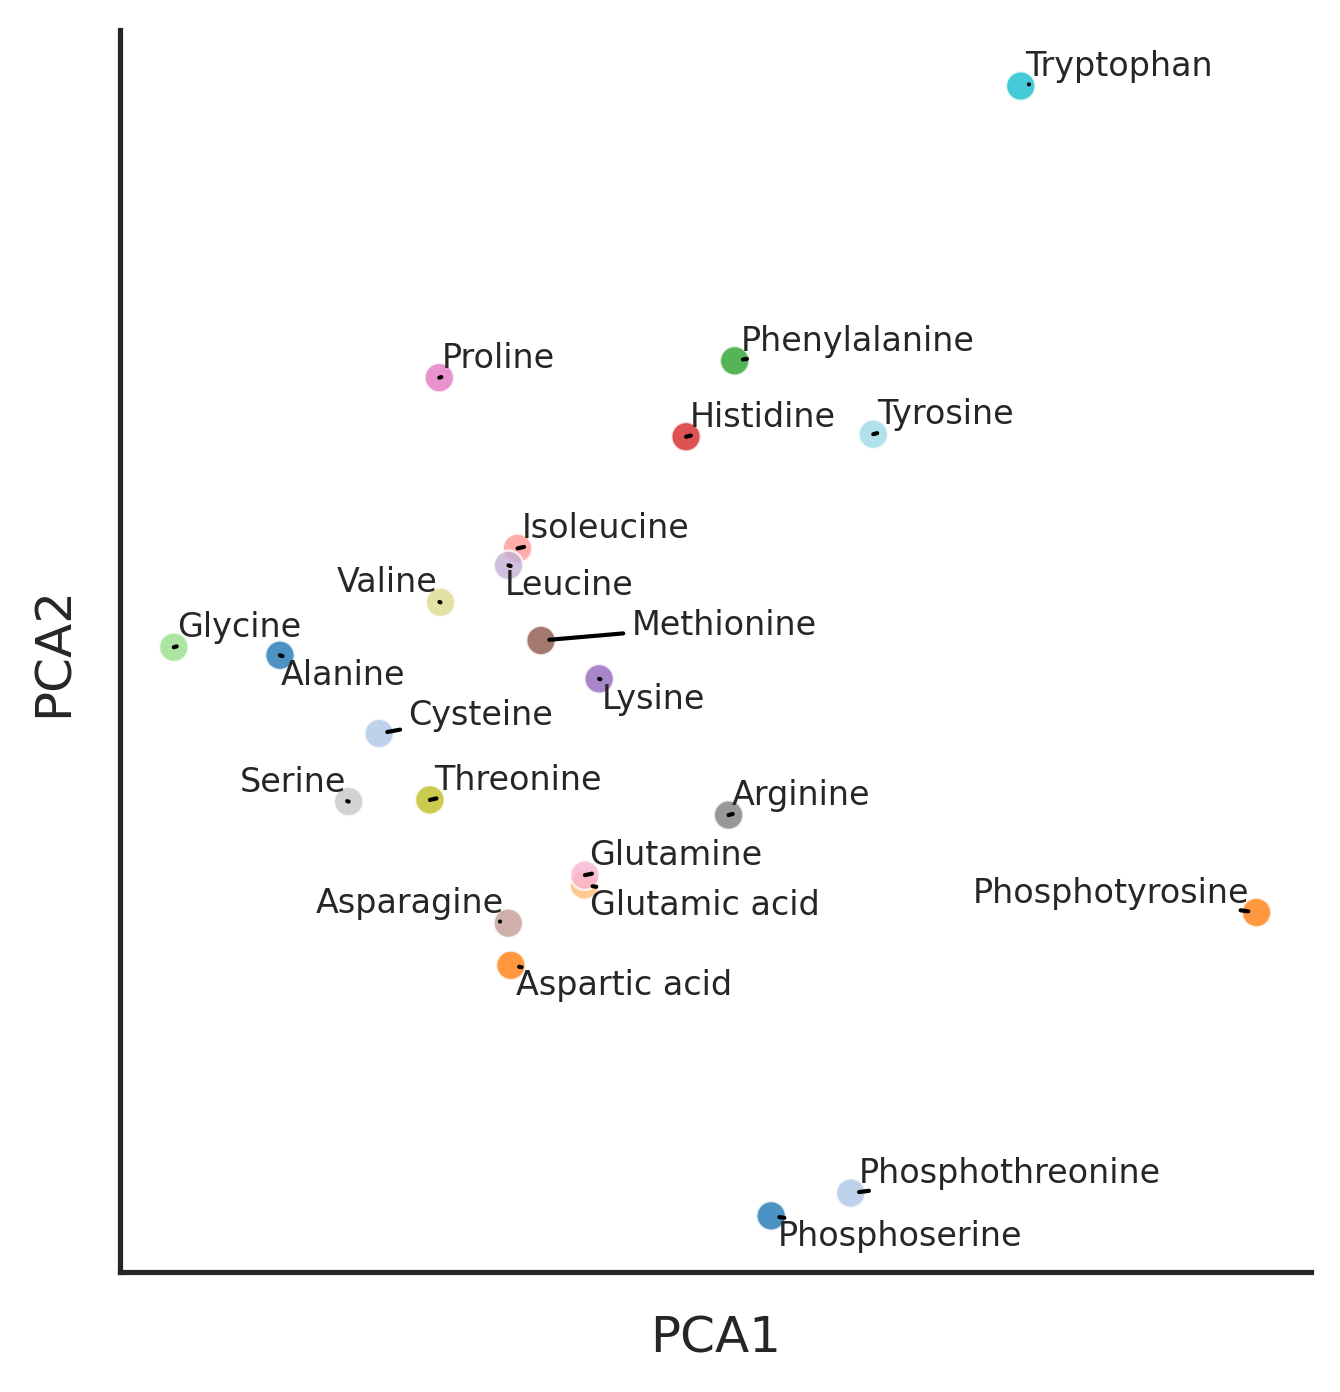

In [ ]:
# visualize aa full feature
plot_cluster(aa_full_feature, name_list = aa_info.Name, hue = 'aa', method = 'pca')

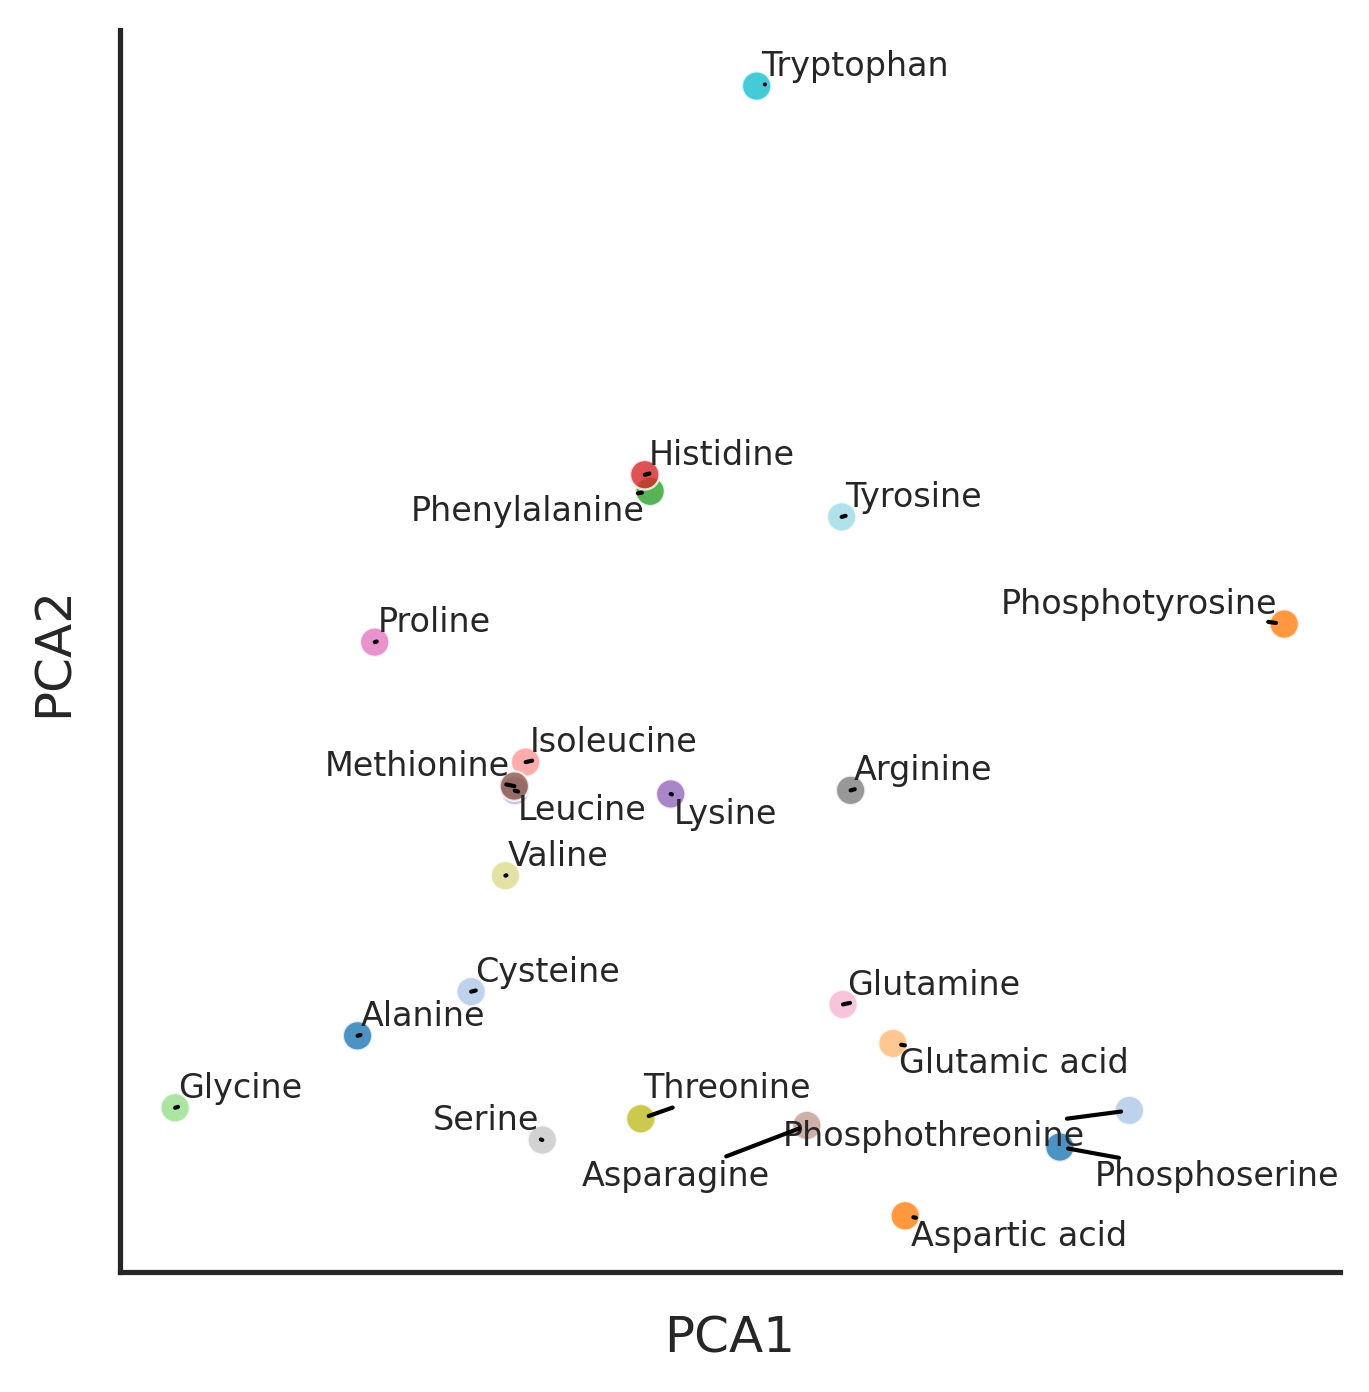

In [ ]:
# visualize aa feature after removing highly correlated features
plot_cluster(aa_reduced_feature, name_list = aa_info.Name, hue = 'aa', method = 'pca')

Protein visualization

In [ ]:
kinase.columns

Index(['Uniprot', 'kinase', 'Gene', 'Family', 'range',
       'Co-expressed binding partners (lengths)', 'Expression system',
       'Purification technique (fusion tag)',
       'Special methods of activation or stabilization ',
       'Reaction conditions', 'temperature(C)', 'Species', 'original_sequence',
       'sequence', 'length', 'category', 'category_big'],
      dtype='object')

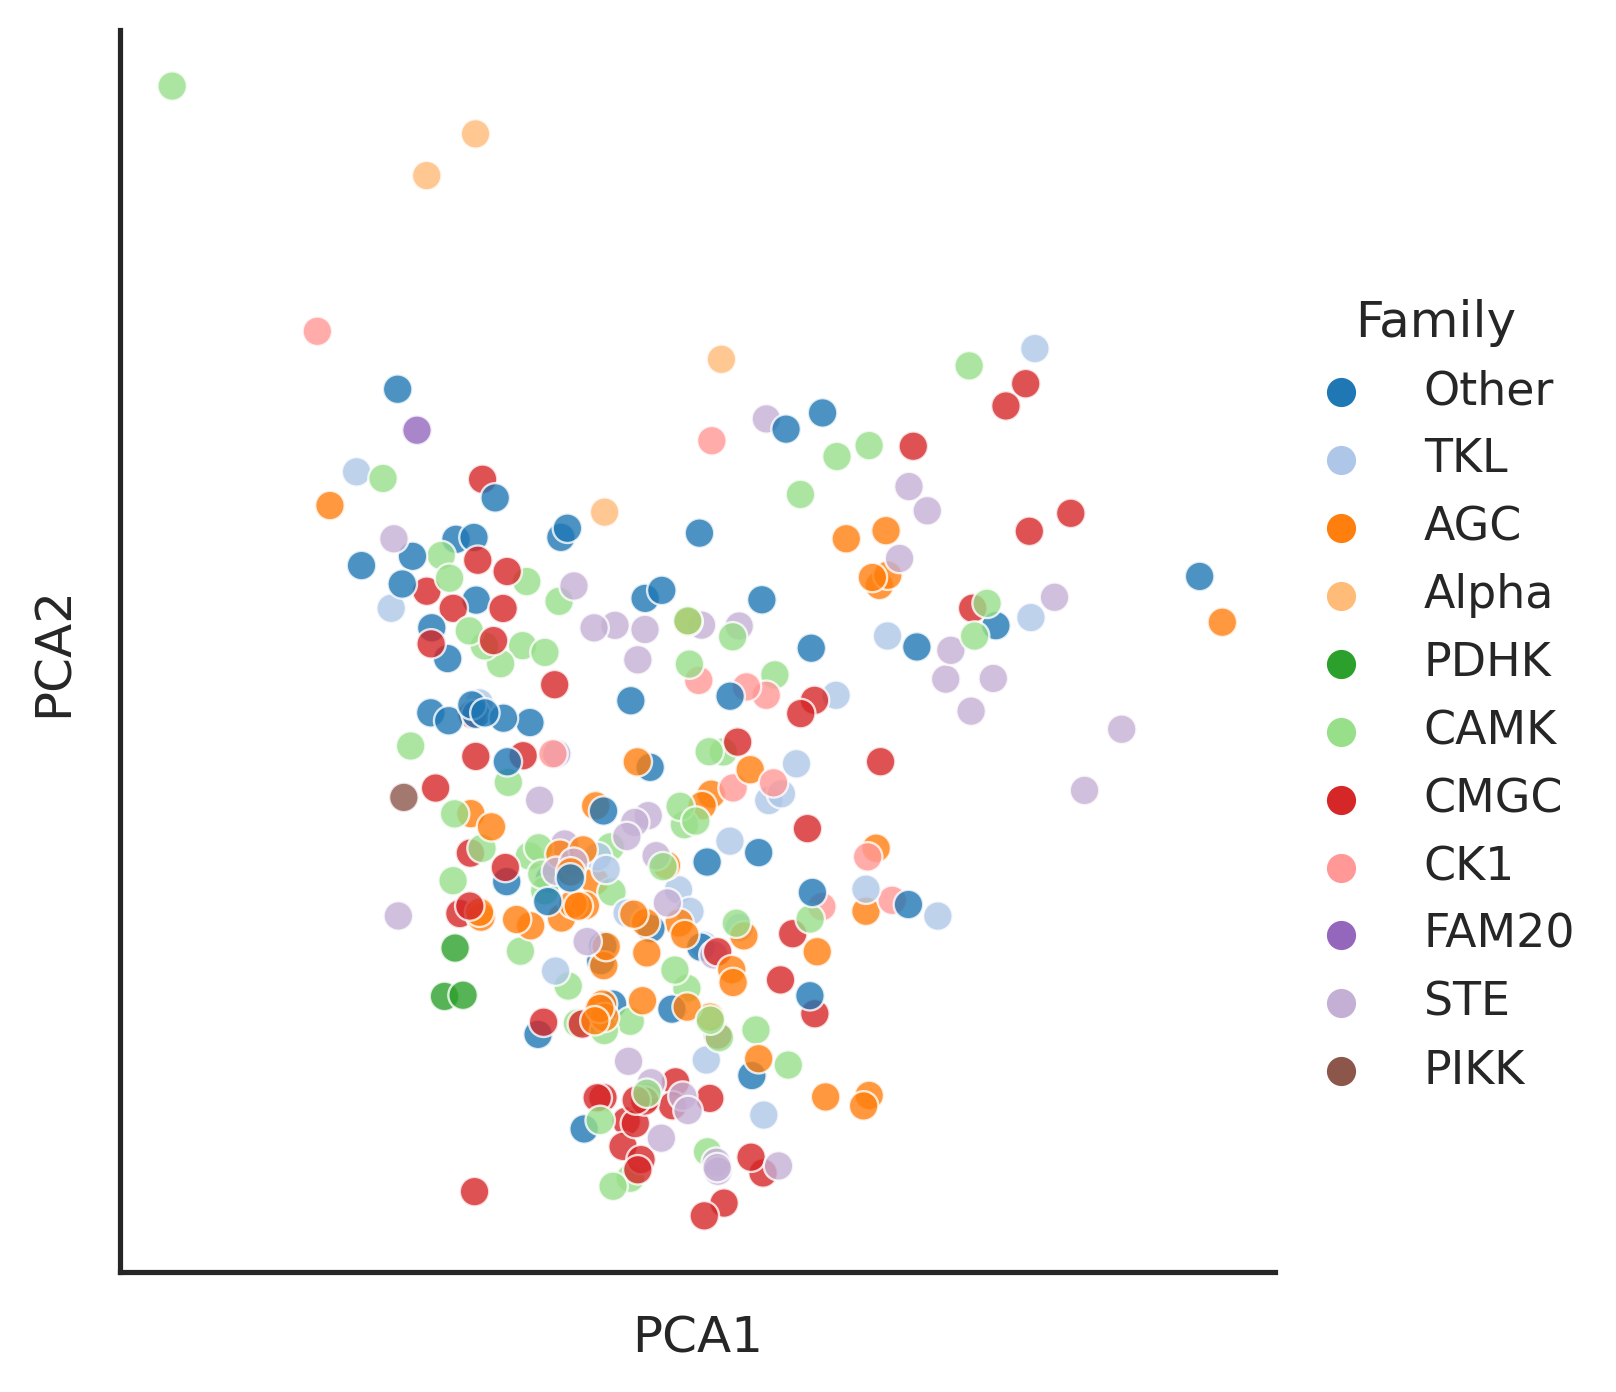

In [ ]:
plot_cluster(esmfeature, hue = kinase.Family, legend=True, method='pca')

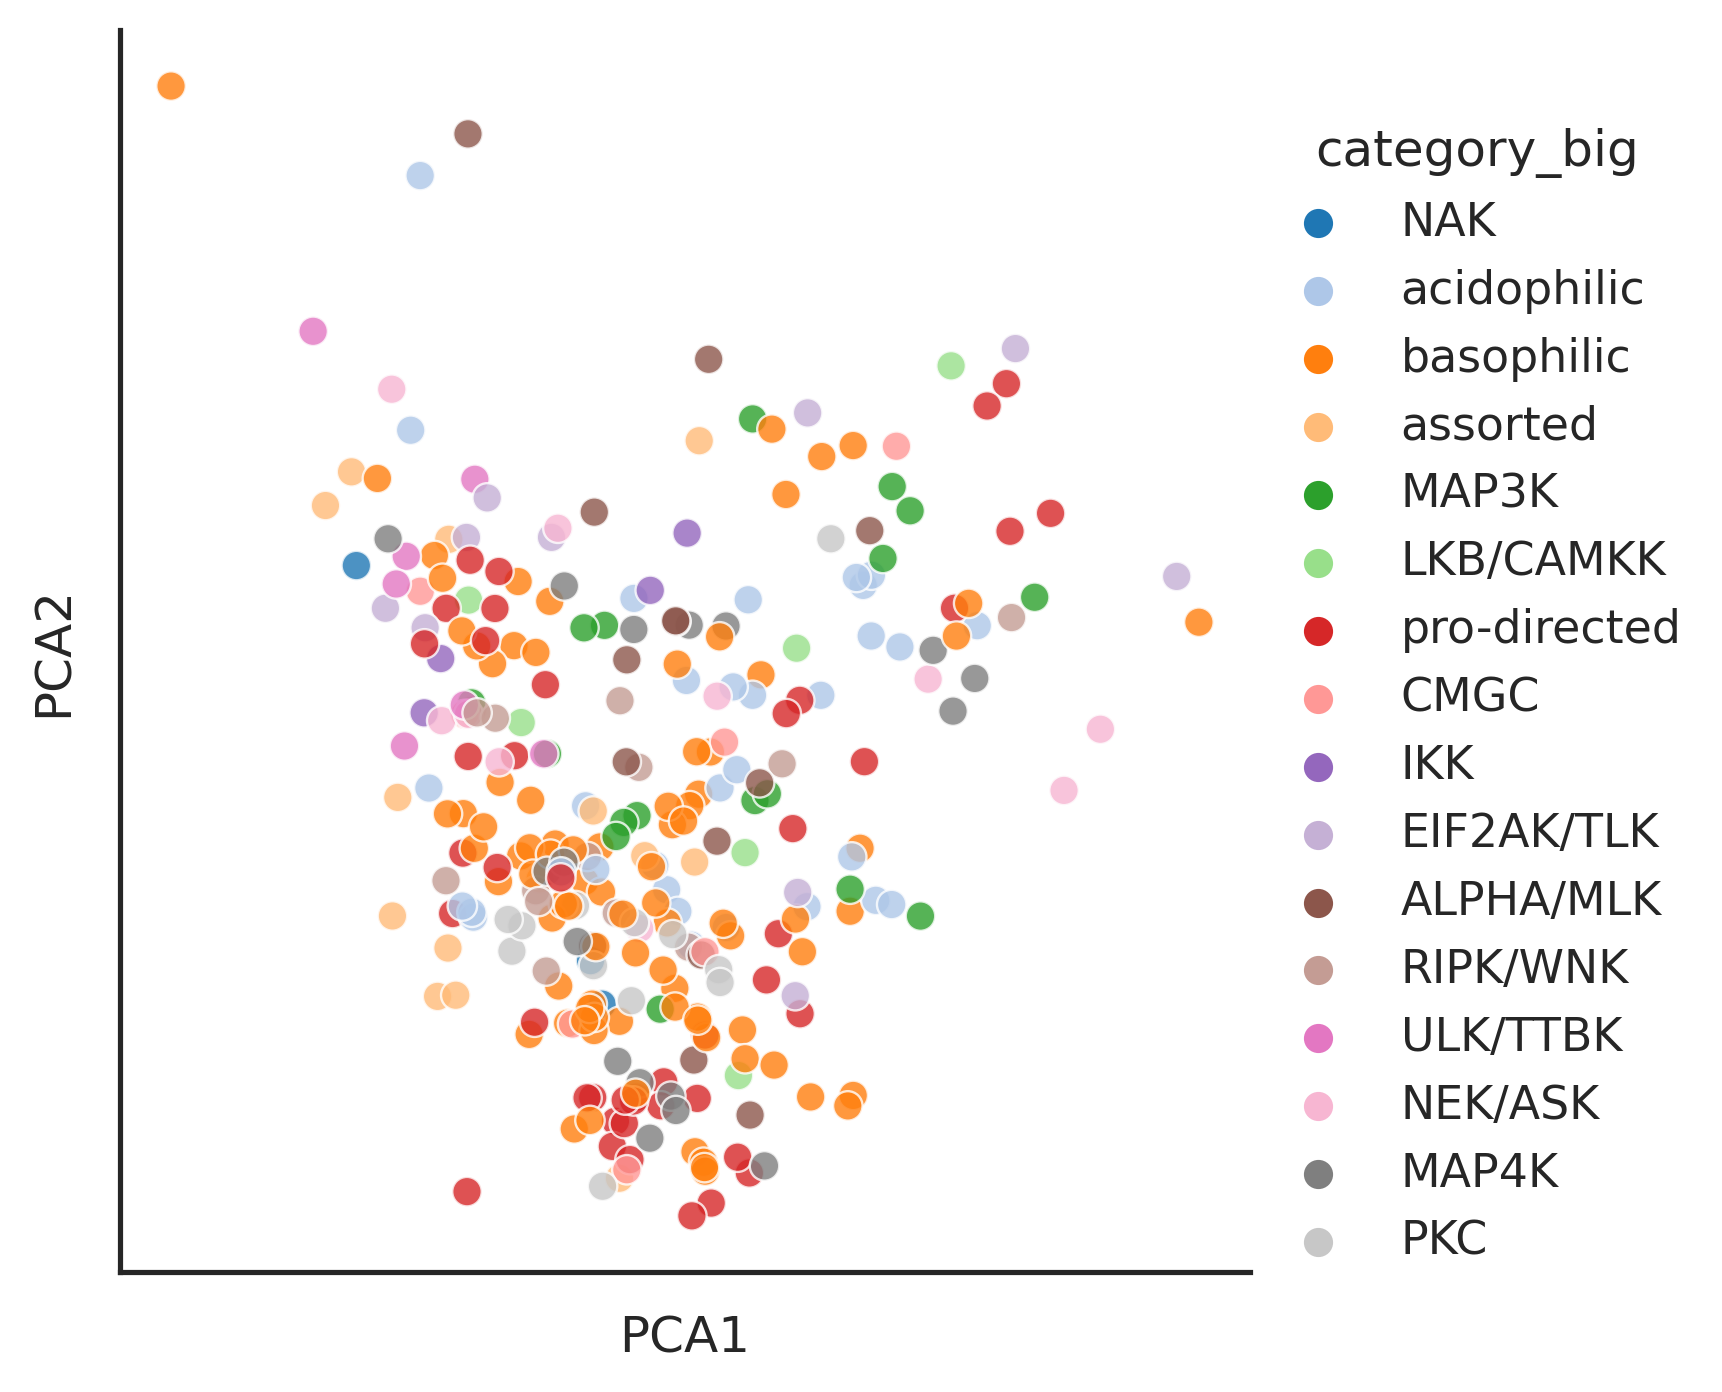

In [ ]:
plot_cluster(esmfeature, hue = kinase.category_big, legend=True, method='pca')

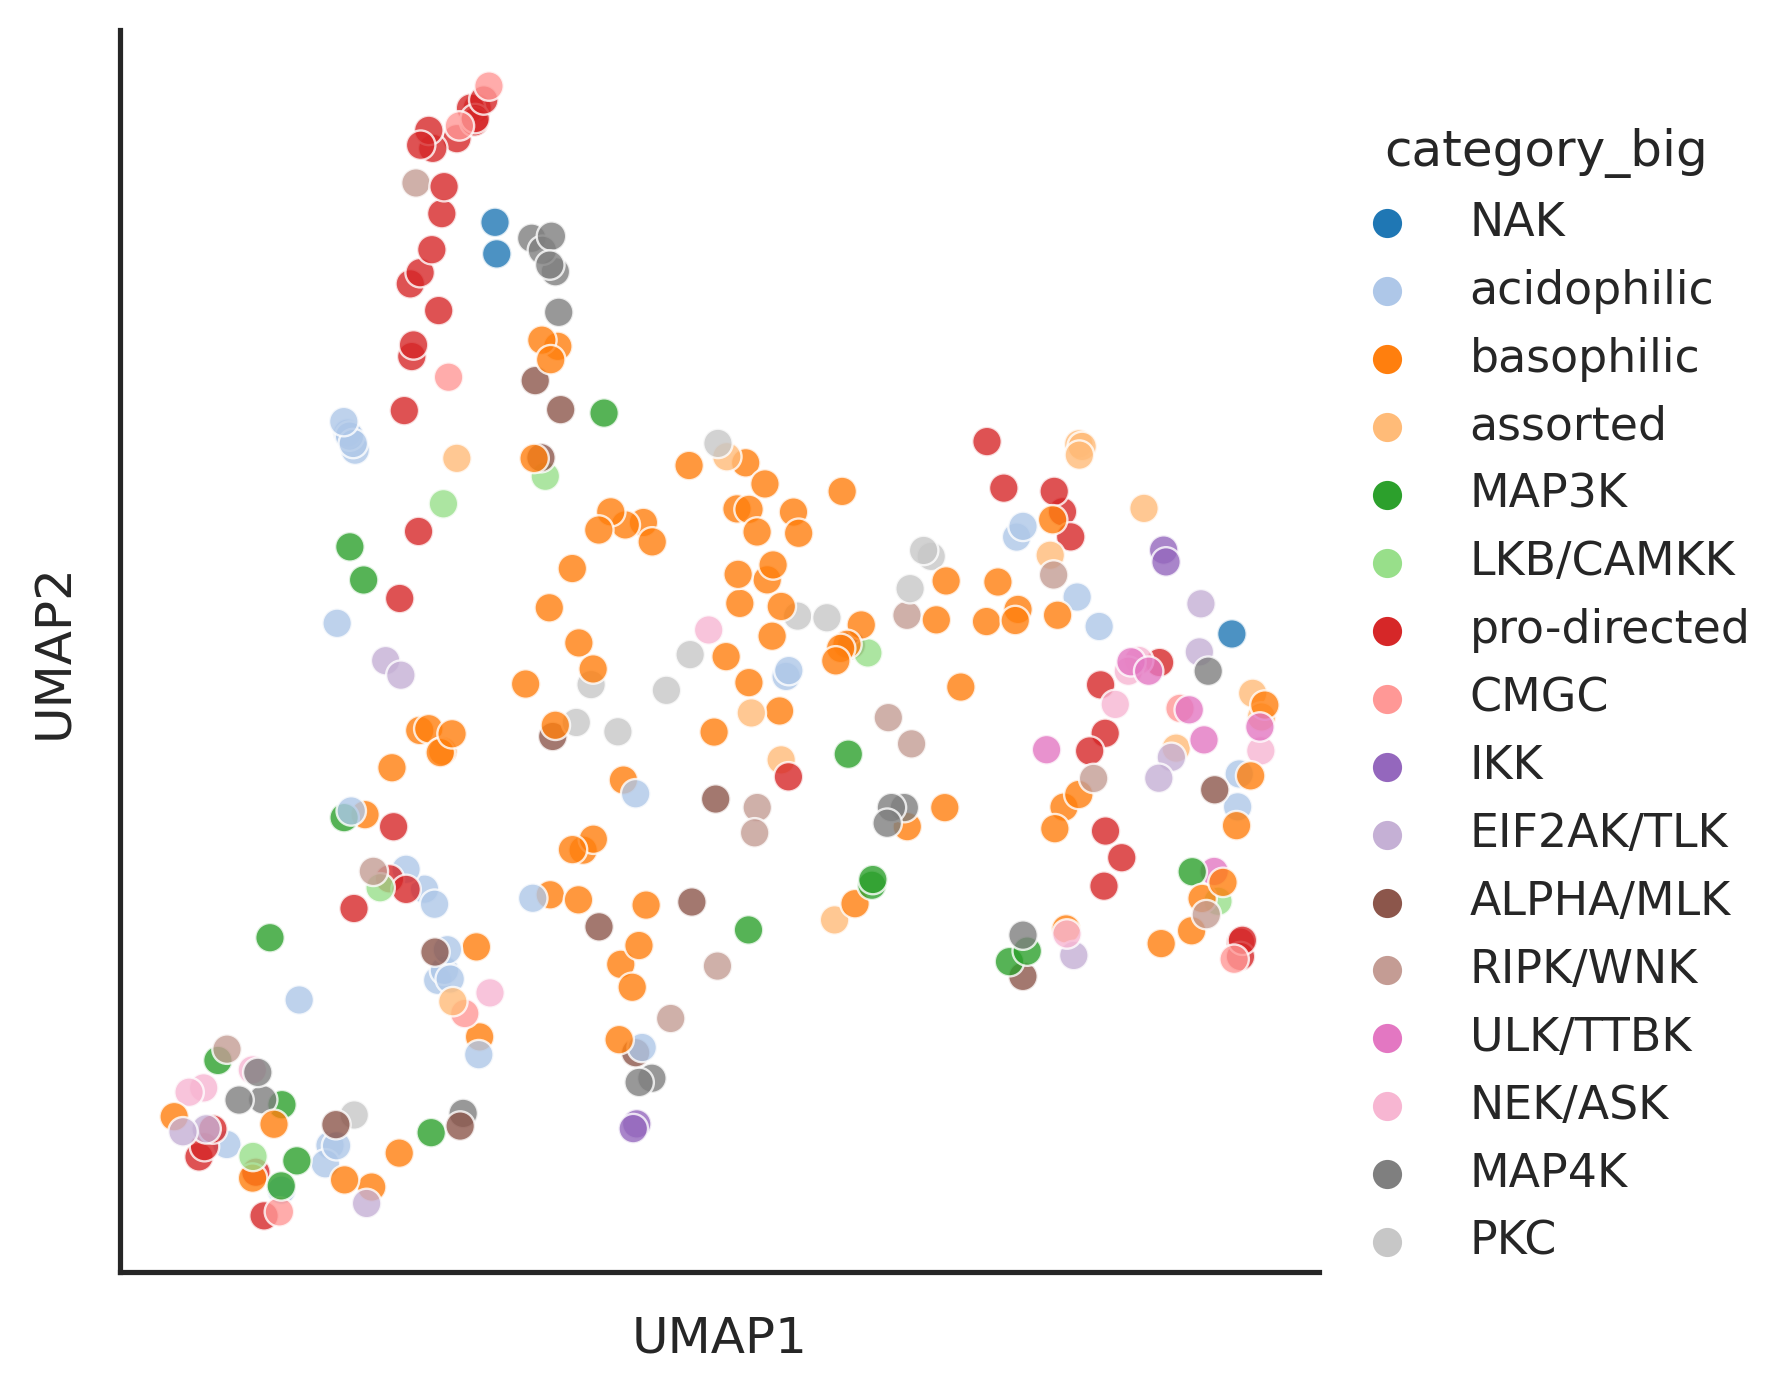

In [ ]:
plot_cluster(esmfeature, hue = kinase.category_big, legend=True, method='umap')